<a href="https://colab.research.google.com/github/TanTai030500/MLca4/blob/main/Lab_6_20130391_NguyenTanTai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from prettytable import PrettyTable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



+---------------+--------+--------+--------+--------+
|   Thuật toán  |  Acc   |  Pre   | Recall |   F1   |
+---------------+--------+--------+--------+--------+
| Random Forest | 0.9759 | 0.9762 | 0.9764 | 0.9762 |
|   NaiveBayes  | 0.8519 | 0.8669 | 0.8492 | 0.8476 |
|      SVM      | 0.9796 | 0.9796 | 0.9796 | 0.9796 |
+---------------+--------+--------+--------+--------+


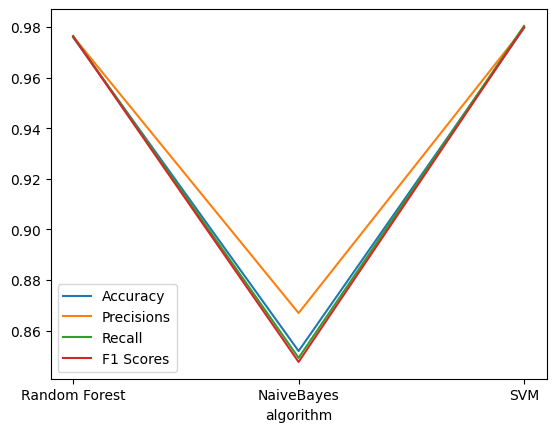

In [ ]:
dataset = datasets.load_digits()
X = dataset.data
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
accuracy_rf = round(metrics.accuracy_score(Y_test, y_pred),4)
precision_rf = round(metrics.precision_score(Y_test, y_pred, average='macro'),4)
recall_rf = round(metrics.recall_score(Y_test, y_pred, average='macro'),4)
f1_rf = round(metrics.f1_score(Y_test, y_pred, average='macro'),4)

model = GaussianNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy_nb =  round(metrics.accuracy_score(Y_test, y_pred),4)
precision_nb =  round(metrics.precision_score(Y_test, y_pred, average='macro'),4)
recall_nb =  round(metrics.recall_score(Y_test, y_pred, average='macro'),4)
f1_nb =  round(metrics.f1_score(Y_test, y_pred, average='macro'),4)

svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
accuracy_svm =  round(metrics.accuracy_score(Y_test, y_pred),4)
precision_svm =  round(metrics.precision_score(Y_test, y_pred, average='macro'),4)
recall_svm =  round(metrics.recall_score(Y_test, y_pred, average='macro'),4)
f1_svm =  round(metrics.f1_score(Y_test, y_pred, average='macro'),4)

#Vẽ bảng so sánh
table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])
table.add_row(['NaiveBayes', accuracy_nb, precision_nb, recall_nb, f1_nb])
table.add_row(['SVM', accuracy_svm, accuracy_svm, accuracy_svm, accuracy_svm])

print(table)

algorithm = ['Random Forest','NaiveBayes','SVM']
values_accs = [accuracy_rf, accuracy_nb, accuracy_svm]
values_pres = [precision_rf, precision_nb, precision_svm]
values_recalls = [recall_rf, recall_nb, recall_svm]
values_f1s = [f1_rf, f1_nb, f1_svm]

plt.plot(algorithm, values_accs, label="Accuracy")
plt.plot(algorithm, values_pres, label="Precisions")
plt.plot(algorithm, values_recalls, label="Recall")
plt.plot(algorithm, values_f1s, label="F1 Scores")
plt.xlabel("algorithm")
plt.legend()


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MLca4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MLca4


In [ ]:
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('bank.csv')
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])
X[['balance']] = scaler.fit_transform(X[['balance']])
X[['day']] = scaler.fit_transform(X[['day']])
X[['campaign']] = scaler.fit_transform(X[['campaign']])
X[['pdays']] = scaler.fit_transform(X[['pdays']])
X[['previous']] = scaler.fit_transform(X[['previous']])
print(X)

            age          job  marital  education default   balance housing  \
0      1.491505       admin.  married  secondary      no  0.252525     yes   
1      1.239676       admin.  married  secondary      no -0.459974      no   
2     -0.019470   technician  married  secondary      no -0.080160     yes   
3      1.155733     services  married  secondary      no  0.293762     yes   
4      1.071790       admin.  married   tertiary      no -0.416876      no   
...         ...          ...      ...        ...     ...       ...     ...   
11157 -0.691015  blue-collar   single    primary      no -0.473616     yes   
11158 -0.187357     services  married  secondary      no -0.246658      no   
11159 -0.774958   technician   single  secondary      no -0.464934      no   
11160  0.148416   technician  married  secondary      no -0.473926      no   
11161 -0.607072   technician  married  secondary      no -0.473926      no   

      loan   contact       day month  duration  campaign     pd

#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(dataset[categorical_columns])

X = pd.concat([X[['age', 'duration', 'campaign', 'pdays', 'previous']], pd.DataFrame(encoded_data.toarray())], axis=1)
X.columns = X.columns.astype(str)

print(X)

            age  duration  campaign     pdays  previous    0    1    2    3  \
0      1.491505      1042 -0.554168 -0.481184 -0.363260  1.0  0.0  0.0  0.0   
1      1.239676      1467 -0.554168 -0.481184 -0.363260  1.0  0.0  0.0  0.0   
2     -0.019470      1389 -0.554168 -0.481184 -0.363260  0.0  0.0  0.0  0.0   
3      1.155733       579 -0.554168 -0.481184 -0.363260  0.0  0.0  0.0  0.0   
4      1.071790       673 -0.186785 -0.481184 -0.363260  1.0  0.0  0.0  0.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
11157 -0.691015       257 -0.554168 -0.481184 -0.363260  0.0  1.0  0.0  0.0   
11158 -0.187357        83  0.547981 -0.481184 -0.363260  0.0  0.0  0.0  0.0   
11159 -0.774958       156 -0.186785 -0.481184 -0.363260  0.0  0.0  0.0  0.0   
11160  0.148416         9 -0.186785  1.109571  1.818332  0.0  0.0  0.0  0.0   
11161 -0.607072       628 -0.554168 -0.481184 -0.363260  0.0  0.0  0.0  0.0   

         4  ...   34   35   36   37   38   39   40 

#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = round(metrics.accuracy_score(Y_test, y_pred_dt),4)
precision_dt =  round(metrics.precision_score(Y_test, y_pred_dt,average='macro'),4)
recall_dt =  round(metrics.recall_score(Y_test, y_pred_dt,average='macro'),4)
f1_dt =  round(metrics.f1_score(Y_test, y_pred_dt,average='macro'),4)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = round(metrics.accuracy_score(Y_test, y_pred_rf),4)
precision_rf = round(metrics.precision_score(Y_test, y_pred_rf, average='macro'),4)
recall_rf = round(metrics.recall_score(Y_test, y_pred_rf, average='macro'),4)
f1_rf = round(metrics.f1_score(Y_test, y_pred_rf, average='macro'),4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn =  round(metrics.accuracy_score(Y_test, y_pred_knn),4)
precision_knn =  round(metrics.precision_score(Y_test, y_pred_knn, average='macro'),4)
recall_knn =  round(metrics.recall_score(Y_test, y_pred_knn, average='macro'),4)
f1_knn =  round(metrics.f1_score(Y_test, y_pred_knn, average='macro'),4)

model = GaussianNB()
model.fit(X_train, Y_train)
y_pred_nb = model.predict(X_test)
accuracy_nb =  round(metrics.accuracy_score(Y_test, y_pred_nb),4)
precision_nb =  round(metrics.precision_score(Y_test, y_pred_nb, average='macro'),4)
recall_nb =  round(metrics.recall_score(Y_test, y_pred_nb, average='macro'),4)
f1_nb =  round(metrics.f1_score(Y_test, y_pred_nb, average='macro'),4)

table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])

table.add_row(['Decision tree', accuracy_dt, precision_dt, recall_dt, f1_dt])
table.add_row(['Random forest', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['NaiveBayes', accuracy_nb, precision_nb, recall_nb, f1_nb])

print(table)


+---------------+--------+--------+--------+--------+
|   Thuật toán  |  Acc   |  Pre   | Recall |   F1   |
+---------------+--------+--------+--------+--------+
| Decision tree | 0.7747 | 0.7743 | 0.7741 | 0.7742 |
| Random forest | 0.7671 | 0.7667 | 0.7669 | 0.7668 |
|      kNN      | 0.7671 | 0.7667 | 0.7669 | 0.7668 |
|   NaiveBayes  | 0.7273 | 0.7455 | 0.7206 | 0.7179 |
+---------------+--------+--------+--------+--------+


#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X, Y)
importances = pd.Series(model.feature_importances_, index=X.columns)
selected_features = importances.nlargest(30).index.tolist()

X_best = X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(X_best, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = round(metrics.accuracy_score(Y_test, y_pred_dt),4)
precision_dt =  round(metrics.precision_score(Y_test, y_pred_dt,average='macro'),4)
recall_dt =  round(metrics.recall_score(Y_test, y_pred_dt,average='macro'),4)
f1_dt =  round(metrics.f1_score(Y_test, y_pred_dt,average='macro'),4)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = round(metrics.accuracy_score(Y_test, y_pred_rf),4)
precision_rf = round(metrics.precision_score(Y_test, y_pred_rf, average='macro'),4)
recall_rf = round(metrics.recall_score(Y_test, y_pred_rf, average='macro'),4)
f1_rf = round(metrics.f1_score(Y_test, y_pred_rf, average='macro'),4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn =  round(metrics.accuracy_score(Y_test, y_pred_knn),4)
precision_knn =  round(metrics.precision_score(Y_test, y_pred_knn, average='macro'),4)
recall_knn =  round(metrics.recall_score(Y_test, y_pred_knn, average='macro'),4)
f1_knn =  round(metrics.f1_score(Y_test, y_pred_knn, average='macro'),4)

model = GaussianNB()
model.fit(X_train, Y_train)
y_pred_nb = model.predict(X_test)
accuracy_nb =  round(metrics.accuracy_score(Y_test, y_pred_nb),4)
precision_nb =  round(metrics.precision_score(Y_test, y_pred_nb, average='macro'),4)
recall_nb =  round(metrics.recall_score(Y_test, y_pred_nb, average='macro'),4)
f1_nb =  round(metrics.f1_score(Y_test, y_pred_nb, average='macro'),4)

table = PrettyTable(['Thuật toán | feature selection','Acc','Pre','Recall','F1'])

table.add_row(['Decision tree', accuracy_dt, precision_dt, recall_dt, f1_dt])
table.add_row(['Random forest', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['NaiveBayes', accuracy_nb, precision_nb, recall_nb, f1_nb])

print(table)

+--------------------------------+--------+--------+--------+--------+
| Thuật toán | feature selection |  Acc   |  Pre   | Recall |   F1   |
+--------------------------------+--------+--------+--------+--------+
|         Decision tree          | 0.7761 | 0.7756 | 0.7758 | 0.7757 |
|         Random forest          | 0.7627 | 0.7623 | 0.7627 | 0.7624 |
|              kNN               | 0.7627 | 0.7623 | 0.7627 | 0.7624 |
|           NaiveBayes           | 0.7326 | 0.7471 | 0.7266 | 0.7249 |
+--------------------------------+--------+--------+--------+--------+


#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [ ]:
dataset = pd.read_csv('creditcard.csv')
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.05, test_size=0.05, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn =  round(metrics.accuracy_score(Y_test, y_pred_knn),4)
precision_knn =  round(metrics.precision_score(Y_test, y_pred_knn, average='macro'),4)
recall_knn =  round(metrics.recall_score(Y_test, y_pred_knn, average='macro'),4)
f1_knn =  round(metrics.f1_score(Y_test, y_pred_knn, average='macro'),4)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = round(metrics.accuracy_score(Y_test, y_pred_dt),4)
precision_dt =  round(metrics.precision_score(Y_test, y_pred_dt,average='macro'),4)
recall_dt =  round(metrics.recall_score(Y_test, y_pred_dt,average='macro'),4)
f1_dt =  round(metrics.f1_score(Y_test, y_pred_dt,average='macro'),4)

lgt = LogisticRegression(random_state = 0) 
lgt.fit(X_train, Y_train)
y_pred_lgt = lgt.predict(X_test)

accuracy_lgt = round(metrics.accuracy_score(Y_test, y_pred_lgt),4)
precision_lgt = round(metrics.precision_score(Y_test, y_pred_lgt, average='macro'),4)
recall_lgt = round(metrics.recall_score(Y_test, y_pred_lgt,average='macro'),4)
f1_lgt = round(metrics.f1_score(Y_test, y_pred_lgt,average='macro'),4)

svc_linear = SVC(kernel='linear', random_state=0)
svc_linear.fit(X_train, Y_train)
y_pred_linear = svc_linear.predict(X_test)

accuracy_linear = round(metrics.accuracy_score(Y_test, y_pred_linear),4)
precision_linear =  round(metrics.precision_score(Y_test, y_pred_linear, average='macro'),4)
recall_linear =  round(metrics.recall_score(Y_test, y_pred_linear, average='macro'),4)
f1_linear =  round(metrics.f1_score(Y_test, y_pred_linear, average='macro'),4)

table = PrettyTable(['Không selection feature','Acc','Pre','Recall','F1'])

table.add_row(['Logictic', accuracy_lgt, precision_lgt, recall_lgt, f1_lgt])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['Decision Tree', accuracy_dt, precision_dt, recall_dt, f1_dt])
table.add_row(['SVM', accuracy_linear, precision_linear, recall_linear, f1_linear])

print(table)
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X_train, Y_train)
importances = pd.Series(model.feature_importances_, index=X_train.columns)
selected_features = importances.nlargest(10).index.tolist()

X_best = X_train[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(X_best, Y_train, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn =  round(metrics.accuracy_score(Y_test, y_pred_knn),4)
precision_knn =  round(metrics.precision_score(Y_test, y_pred_knn, average='macro'),4)
recall_knn =  round(metrics.recall_score(Y_test, y_pred_knn, average='macro'),4)
f1_knn =  round(metrics.f1_score(Y_test, y_pred_knn, average='macro'),4)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = round(metrics.accuracy_score(Y_test, y_pred_dt),4)
precision_dt =  round(metrics.precision_score(Y_test, y_pred_dt,average='macro'),4)
recall_dt =  round(metrics.recall_score(Y_test, y_pred_dt,average='macro'),4)
f1_dt =  round(metrics.f1_score(Y_test, y_pred_dt,average='macro'),4)

lgt = LogisticRegression(random_state = 0) 
lgt.fit(X_train, Y_train)
y_pred_lgt = lgt.predict(X_test)

accuracy_lgt = round(metrics.accuracy_score(Y_test, y_pred_lgt),4)
precision_lgt = round(metrics.precision_score(Y_test, y_pred_lgt, average='macro'),4)
recall_lgt = round(metrics.recall_score(Y_test, y_pred_lgt,average='macro'),4)
f1_lgt = round(metrics.f1_score(Y_test, y_pred_lgt,average='macro'),4)

svc_linear = SVC(kernel='linear', random_state=0)
svc_linear.fit(X_train, Y_train)
y_pred_linear = svc_linear.predict(X_test)

accuracy_linear = round(metrics.accuracy_score(Y_test, y_pred_linear),4)
precision_linear =  round(metrics.precision_score(Y_test, y_pred_linear, average='macro'),4)
recall_linear =  round(metrics.recall_score(Y_test, y_pred_linear, average='macro'),4)
f1_linear =  round(metrics.f1_score(Y_test, y_pred_linear, average='macro'),4)

table = PrettyTable(['Có selection feature','Acc','Pre','Recall','F1'])

table.add_row(['Logictic', accuracy_lgt, precision_lgt, recall_lgt, f1_lgt])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['Decision Tree', accuracy_dt, precision_dt, recall_dt, f1_dt])
table.add_row(['SVM', accuracy_linear, precision_linear, recall_linear, f1_linear])
print(table)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Finally,
Save a copy in your Github. Remember renaming the notebook.